# Effective App Profiles for Google Play and the App Store

### The purpose of this project is to identify which categories of free apps are most likely to draw users and, consequently,  generate more revenue through in-app ads.

The following datasets will be used:

-  A [dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play.
-  A [dataset](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store.

## Open and Explore Datasets

Opening the datasets:

In [1]:
# Apple Store dataset
openedFile = open('AppleStore.csv')
from csv import reader
readFile = reader(openedFile)
ios = list(readFile)
iosHeader = ios[0]
ios = ios[1:]

# Android Store dataset
openedFile = open('googleplaystore.csv')
from csv import reader
readFile = reader(openedFile)
android = list(readFile)
androidHeader = android[0]
android = android[1:]

The next step is to create a custom function ```readData()``` that can be used to print rows in a readable way.

In [2]:
def readData(dataset, start, end, rows_and_columns = False):
        dataSlice = dataset[start:end]
        for row in dataSlice:
            print(row)
            print('\n')
            
        if rows_and_columns:
            print('Number of rows: ', len(dataset))
            print('Number of columns:', len(dataset[0]))

The ```readData()``` function does the following:

- Takes in four parameters:
    - ```dataset```, which will be a list of lists
    - ```start``` and ```end```, which will both be integers and represent the starting and the ending indices of a slice from the dataset
    - ```rows_and_columns```, which will be a Boolean and has False as a default argument
- Slices the dataset using ```dataset[start:end]```
- Loops through the slice, and for each iteration, prints a row and adds a new line after that row using ```print('\n')```
    - The ```\n``` in ```print('\n')``` is a special character that won't print. Instead, the \n character adds a new line, and we use ```print('\n')``` to add some blank space between rows
- Prints the number of rows and columns if ```rows_and_columns``` is ```True```
    - ```dataset``` shouldn't have a header row, or the function will print the wrong number of rows (one more row compared to the actual length)

Let's explore GooglePlay datasets using ```readData()``` function:

In [3]:
print(androidHeader)
print('\n')
readData(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows:  10841
Number of columns: 13


Columns of interest for this analysis:

- ```'App'```
- ```'Category'```
- ```'Reviews'```
- ```'Installs'```
- ```'Type'```
- ```'Price'```
- ```'Genres'```

Let's look at the AppStore dataset now:

In [4]:
print(iosHeader)
print('\n')
readData(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows:  7197
Number of columns: 16


Columns of interest for this analysis:

- ```'track_name'```
- ```'currency'```
- ```'price'``` 
- ```'rating_count_tot'```
- ```'rating_count_ver'```
- ```'prime_genre'```

## Deleting Wrong Data

The Google Play data set includes a [discussion area](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion), and [one of the comments](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/66015) details an inaccuracy for row 10472. Printing this row will allow us to compare it to the header and another accurate row.

In [5]:
print(android[10472]) #incorrect row
print('\n')
print(androidHeader) #header
print('\n')
print(android[0]) #correct row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


The Life Made WI-Fi Touchscreen Photo Frame app is represented by row 10472, and the rating is 19, as can be seen. However, the maximum rating for a Google Play app is 5, therefore, rating 19 is obviously incorrect. 
As indicated in the [discussion section](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/66015), the fault is due to a missing value in the "Category" field. Therefore, we will remove this row.

In [6]:
print(len(android))
del android[10472]  #deleting the row
print(len(android))

10841
10840


## Removing Duplicate Rows

### Part I

If we take a close look at our dataset, we can see that some apps have several entries in the Google Play. For instance, the Instagram application contains four entries:

In [7]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


Let's see how many more cases we have, where an app occurs more than once:

In [8]:
appsDuplicate = []
appsUnique = []

for app in android:
    name = app[0]
    if name in appsUnique:
        appsDuplicate.append(name)
    else:
        appsUnique.append(name)

print('Name of duplicate apps:', len(appsDuplicate))
print('\n')
print('Examples of duplicate apps:', appsDuplicate[:15])

Name of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


We don't want to count certain applications more than once while analyzing data, thus we must delete duplicate entries and keep only one record per app.

To do that, we need to:

- Make a dictionary in which each key is a unique app name and the value is the number of reviews the app has received.
- Use the dictionary to generate a new data set with only one record per app (and we only choose the apps with the most ratings).

### Part II

Let's start by building the dictionary.

In [9]:
maxReviews = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if name in maxReviews and maxReviews[name] < n_reviews:
        maxReviews[name] = n_reviews
    elif name not in maxReviews:
        maxReviews[name] = n_reviews

Since we discovered that an app occurs more than once in 1,181 different code cells, the length of our dictionary (of unique apps) should be equal to the difference between the size of our data set and 1,181.

In [10]:
print('Expected length:', len(android) - 1181)
print('Actual length:', len(maxReviews))

Expected length: 9659
Actual length: 9659


Let's use the ```maxReviews``` dictionary to get rid of the duplicates. In the situation of duplicate cases, we will only maintain the entries with the most reviews. In the following code cell:

- We create two empty lists, ```cleanAndroid``` and ```added```.
- We iterate over the ```android``` data set, and for every iteration:
    - We isolating the name of the app and the number of reviews.
    - We add the current row (```app```) to the ```cleanAndroid``` list and the app name (name) to the ```added``` list if: 
        - The current app's number of reviews equals the number of reviews specified in the ```maxReviews``` dictionary.
        - The app's name isn't already in the ```added``` list.

In [11]:
cleanAndroid = []
added = []

for app in android:
    name = app[0] 
    n_reviews = float(app[3])
    
    if (maxReviews[name] == n_reviews) and (name not in added):
        cleanAndroid.append(app)
        added.append(name)

We explore the new data set to confirm that the number of rows is 9,659:

In [12]:
readData(cleanAndroid, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows:  9659
Number of columns: 13


Great, now we can confirm that we have 9,659 rows!

## Removing Non-English Apps

### Part I

We can notice some apps suggest that they are not for English-speaking audience because of their names. Let's see:

In [13]:
print(ios[813][1])
print(ios[6731][1])

print(cleanAndroid[4412][0])
print(cleanAndroid[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


These kinds of applications need to be deleted as we have no interest in keeping them.  One technique to accomplish this is to eliminate each app whose name contains a symbol that is not used in English language.

All of these English characters are encoded using the ASCII standard. Each ASCII letter has a corresponding integer between 0 and 127, which we can use to create a function that verifies an app name and informs us whether it contains non-ASCII characters. 

In [14]:
def eng(string):
                  
    for character in string:
        if ord(character) > 127:
            return False
    return True

print(eng('Instagram'))
print(eng('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


Let's also consider the fact that some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. As a result, if we utilize the function in its current version, we will delete useful apps.

So we should only delete an app if its name contains more than three non-ASCII characters in order to reduce the effect of data loss.

In [15]:
def eng(string):
    nonASCII = 0
    
    for character in string:
        if ord(character) > 127:
            nonASCII += 1
    
    if nonASCII > 3:
        return False
    return True

print(eng('Docs To Go™ Free Office Suite'))
print(eng('Instachat 😜'))

True
True


We can filter out the non-English apps for both data sets:

In [16]:
engAndroid = []
engiOS = []

for app in cleanAndroid:
    name = app[0]
    if eng(name):
        engAndroid.append(app)

for app in ios:
    name = app[1]
    if eng(name):
        engiOS.append(app)
        
readData(engAndroid, 0, 3, True)
print('\n')
readData(engiOS, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows:  9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+',

## Isolating the Free Apps

The goal is to come up with the applications that are free to download and install, so the primary source of income is in-app advertising. Thus, for our analysis, we'll need to isolate solely the free apps. We've separated out the free applications for both of our data sets below.

In [17]:
finalAndroid = []
finaliOS = []

for app in engAndroid:
    price = app[7]
    if price == '0':
        finalAndroid.append(app)
        
for app in engiOS:
    price = app[4]
    if price =='0.0':
        finaliOS.append(app)
        
print(len(finalAndroid))
print(len(finaliOS))

8864
3222


We have 8864 Android apps and 3222 iOS apps, which is enough for our analysis.

## Most Common Apps by Genre

### Part I

Our goal is to identify the app categories that are most likely to draw users because the quantity of users has a significant impact on the revenue.

Here's a step validation process for app ideas that is designed to reduce risks and costs:

-  Create a minimal Android version of the application and release it on Google Play.
-  If the app receives positive feedback from users, we continue to work on it.
-  We also create an iOS version of the app and upload it to the App Store if it is profitable after six months.

Finding app profiles that are successful on both marketplaces is essential since our ultimate aim is to upload the app to both the App Store and Google Play. For instance, a productivity tool that uses gamification can have the characteristics that appeals to both audiences.

### Part II

Let's start the analysis by gaining an understanding of the most popular genres in each area. In order to do this, a frequency table will be created for the ```prime_genre``` column from the App Store data set as well as the ```Genres``` and ```Category``` columns from the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

-  One function to generate frequency tables that show percentages
-  Another function that we can use to display the percentages in a descending order

In [18]:
def freqTable(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    percentagesTable = {}
    for key in table:
        percentage = (table[key] / total) * 100
        percentagesTable[key] = percentage 
    
    return percentagesTable

def displayTable(dataset, index):
    table = freqTable(dataset, index)
    displayTable = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        displayTable.append(key_val_as_tuple)
        
    sortedTable = sorted(displayTable, reverse = True)
    for entry in sortedTable:
        print(entry[1], ':', entry[0])

### Part III

Examining the frequency table for the Google Play - ```Category``` column:

In [19]:
displayTable(finalAndroid, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

We can observe that there aren't very many applications made for entertainment, and it appears like most apps are made for practical purposes (family, tools, business, lifestyle, productivity, etc.). But if we look into this further, we see that the family category—which includes over 19% of all apps—primarily refers to children's games.

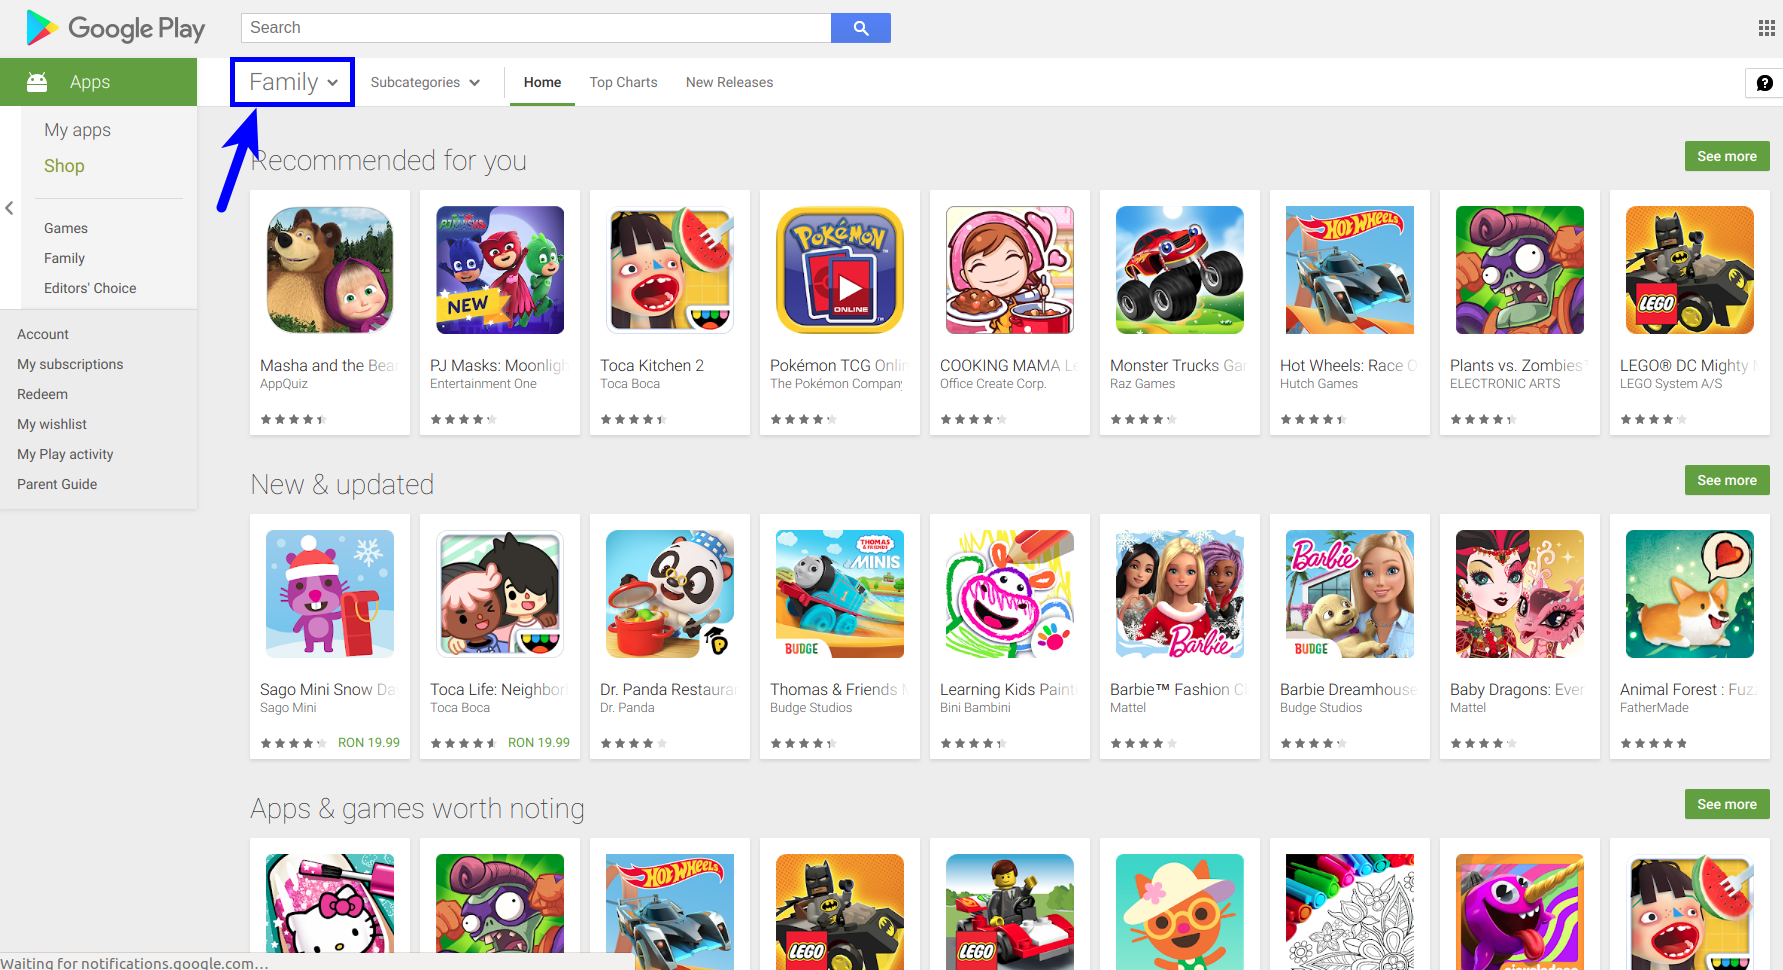

Now let's examine the frequency table for the App Store - ```Category``` column:

In [20]:
displayTable(finaliOS, -5) #Category

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can observe that more than half (58.16%) of the free English applications are games. Photo and video applications come in at about 5%, followed by entertainment apps at about 8%. Social networking applications account for 3.29% of the apps in our data collection, behind only educational apps with 3.66% of the total.

To conlude, if we compare App Store to Google Play, then Google Play seems to offer a stronger representation of useful apps. The frequency chart we observe in the ```Genres``` column supports this impression as well:

In [21]:
displayTable(finalAndroid, -4)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

As of right now, the observation is that App Store is dominated by games, while Google Play displays a more balanced landscape of both useful and games. Next step is to move forward to obtaining a sense of the types of apps that are most popular.

## Most Popular Apps by Genre on App Store

Calculating the average number of installations for each app genre is one technique to determine which genres are the most popular (have the most users). This information is present in the ```Installs``` column for the Google Play data set, but it's missing from the App Store data set. To get around this, we can take the total number of user ratings as a proxy, which we can find in the ```rating_count_tot``` app.

The average number of user ratings for each genre of app on the App Store is calculated below:

In [22]:
genresiOS = freqTable(finaliOS, -5)

for genre in genresiOS:
    total = 0
    lenGenre = 0
    for app in finaliOS:
        genreApp = app[-5]
        if genreApp == genre:
            n_ratings = float(app[5])
            total += n_ratings
            lenGenre += 1
    avgRatings = total / lenGenre
    print(genre, ':', avgRatings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


The majority of user reviews are for navigation apps, but Waze and Google Maps have a significant impact on this statistic:

In [23]:
for app in finaliOS:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5])

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The similar pattern applies for social networking applications, where the industry giants like Facebook, Pinterest, Skype, etc. have a significant impact on the average number. The same is true for music applications, where a small handful of dominant companies like Spotify and Shazam significantly affect the overall number.

Finding popular genres is the main goal, but applications for music, social networking, or navigation may appear more popular than they actually are. Few apps with hundreds of thousands of user ratings appear to be distorting the average amount of ratings, while other apps may have difficulty surpassing the 10,000 mark. We could improve our understanding by deleting these wildly successful applications from each category and then recalculating the averages, but we'll leave this level of detail alone for now.

The average user rating for reference apps is 74,942; although the Bible and Dictionary.com are the real culprits for the average rating's skew:

In [24]:
for app in finaliOS:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche appears to have considerable promise. One thing we could do is take some well-known book and transform it into an application where we could add further features in addition to the book's original text. For instance, daily passages from the book, an audiobook, quizzes on it, etc. Additionally, we could include a dictionary so users wouldn't have to leave the app in order to look up words in another app.

Considering that games and entertainment apps predominate in the App Store, this idea appears to make sense. As a result, a useful software may have a better chance of standing out among the vast majority of applications available on the App Store given that the market for fun apps may be a little crowded.

Weather, books, food and drink, or finance are some more categories that appear to be in demand. The book genre seems to have some overlap with the app concept we discussed above, but we don't find the other genres to be particularly compelling:

-  Weather — people don't devote a lot of time on weather apps, and there are few opportunities for in-app advertising to make profits. Additionally, connecting our apps to non-free APIs can be necessary to obtain trustworthy live weather data.

-  Food and drink — McDonald's, Dunkin' Donuts, Starbucks, etc. are a few examples. Consequently, creating a well-liked food and beverage app involves actual cooking and a delivery service, both of which are outside the scope of our business.

-  Finance — such as bill payment, money transfers, etc. We don't want to employ a financial specialist only to create an app because building a finance app demands subject expertise.

## Most Popular Apps by Genre on Google Play

We actually have install statistics for the Google Play market, so we should be able to get a better sense of how popular each genre is. Although we can see that most figures are open-ended (100+, 1,000+, 5,000+, etc.),  so the install numbers don't look exact enough. However, we just need a general understanding of which app genres get the most people so it's fine if we don't have the absolute accuracy when it comes to user numbers: 

In [27]:
displayTable(finalAndroid, 5) #Installs columns

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


For performing calculations, we need to convert each install number to a ```float```, which means we must remove the commas and the plus symbols; otherwise, the conversion will not succeed and an error will be thrown. Additionally, we need to calculate the average number of installs for each category.

In [28]:
categoriesAndroid = freqTable(finalAndroid, 1)

for category in categoriesAndroid:
    total = 0
    lenCategory = 0
    for app in finalAndroid:
        categoryApp = app[1]
        if categoryApp == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            lenCategory += 1
    avgInstalls = total / lenCategory
    print(category, ':', avgInstalls)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

Communication apps have around 38,456,119 installations. A few applications (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts) with over one billion installations and a few others with between 100 million and 500 million installs significantly skew this number:

In [29]:
for app in finalAndroid:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                     or app[5] == '500,000,000+'
                                     or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

The average would drop by about ten times if all communication apps with more than 100 million installs were removed:

In [30]:
under_100mil = []

for app in finalAndroid:
    n_installs = app[5]
    n_installs = n_installs.replace(',' , '')
    n_installs = n_installs.replace('+' , '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100mil.append(float(n_installs))
        
sum(under_100mil) / len(under_100mil)

3603485.3884615386

The multimedia category, which is in second place with 24,727,872 installs, has the similar pattern. Applications like Youtube, Google Play Movies & TV, or MX Player rule the market. The same tendency can be seen in productivity applications, networking apps (including industry heavyweights like Facebook, Instagram, and Google+), and photography apps (like Google Photos and other well-known photo editors) (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Once more, the key concern is that certain app genres can appear to be more common than they actually are. Additionally, it appears that a few giants that are difficult to compete against dominate certain niches.

With an average of 8,767,811 installs, the books and reference category also appears to be very common. We discovered that this genre has some potential to do well on the App Store, and our goal is to suggest an app genre that has promise for being profitable on both the App Store and Google Play. It's worth to study this in more detail.

Let's look at a few of these apps and how many people have installed them:

In [31]:
for app in finalAndroid:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference category includes a wide range of programs, including tools for processing and reading ebooks, different libraries, dictionaries, and lessons on programming or other languages. There seem to be a few still quite popular apps that skew the average:

In [32]:
for app in finalAndroid:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


Although it appears that there are just a few of really successful apps, this sector still has potential. Let's try to come up with some app ideas for the mid-popular apps (with between 1,000,000 and 100,000,000 downloads):

In [33]:
for app in finalAndroid:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H